###Context
You are a helpful assistant. You will be given multiple choice answers for each question. Your final answer should be formatted with "the correct answer is [your choice]."
###Prompts
Explain this question in at least 50 words. Then solve for the answer.
Explain this problem in at least 50 words. Then solve for the answer.

In [ ]:
!pip install datasets
!pip install transformers
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.3 MB/s eta 0:00:00


In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset
import json
dataset = load_dataset("aqua_rat")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/97467 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/254 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/254 [00:00<?, ? examples/s]

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

torch.set_default_device("cuda")

tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-1_5", trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained("microsoft/phi-1_5", trust_remote_code=True)

pytorch_model.bin:   0%|          | 0.00/2.84G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/69.0 [00:00<?, ?B/s]

In [ ]:
!pip install flash-attn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 31.2 MB/s eta 0:00:00
  Created wheel for flash-attn: filename=flash_attn-2.3.6-cp310-cp310-linux_x86_64.whl size=56598219 sha256=07a5c68948f0dbdc00e4ca74e7247ceb0c4adcde7f29d3de358c8ac2b8848709
  Stored in directory: /root/.cache/pip/wheels/24/5f/16/5044cdddb6dfb3331dfbffa28ab6096ec2900777af5cb0253a
Successfully built flash-attn


In [ ]:
chain_of_thought_aqua = """Q: There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done, there
will be 21 trees. How many trees did the grove workers plant today?
A)6 B)7 C)2 D)4
A: We start with 15 trees. Later we have 21 trees. The difference must be the number of trees they planted. So,
they must have planted 21 - 15 = 6 trees. The correct answer is A.
Q: If there are 3 cars in the parking lot and 2 more cars arrive, how many cars are in the parking lot?
A)2 B)4 C)5 D)1
A: There are 3 cars in the parking lot already. 2 more arrive. Now there are 3 + 2 = 5 cars. The correct answer is C.
Q: Leah had 32 chocolates and her sister had 42. If they ate 35, how many pieces do they have left in total?
A)40 B)39 C)20 D)25
A: Leah had 32 chocolates and Leah’s sister had 42. That means there were originally 32 + 42 = 74 chocolates.
35 have been eaten. So in total they still have 74 - 35 = 39 chocolates. The correct answer is B.
Q: Jason had 20 lollipops. He gave Denny some lollipops. Now Jason has 12 lollipops. How many lollipops did
Jason give to Denny?
A)18 B)10 C)6 D)8
A: Jason had 20 lollipops. Since he only has 12 now, he must have given the rest to Denny. The number of
lollipops he has given to Denny must have been 20 - 12 = 8 lollipops. The correct answer is D.
Q: Shawn has five toys. For Christmas, he got two toys each from his mom and dad. How many toys does he
have now?
A)10 B)3 C)11 D)9
A: He has 5 toys. He got 2 from mom, so after that he has 5 + 2 = 7 toys. Then he got 2 more from dad, so in
total he has 7 + 2 = 9 toys. The correct answer is D.
Q: There were nine computers in the server room. Five more computers were installed each day, from monday
to thursday. How many computers are now in the server room?
A)40 B)29 C)24 D)30
A: There are 4 days from monday to thursday. 5 computers were added each day. That means in total 4 * 5 = 20
computers were added. There were 9 computers in the beginning, so now there are 9 + 20 = 29 computers. The correct
answer is B.
Q: Michael had 58 golf balls. On tuesday, he lost 23 golf balls. On wednesday, he lost 2 more. How many golf
balls did he have at the end of wednesday?
A)50 B)40 C)33 D)26
A: Michael initially had 58 balls. He lost 23 on Tuesday, so after that he has 58 - 23 = 35 balls. On Wednesday
he lost 2 more so now he has 35 - 2 = 33 balls. The correct answer is C.
Q: Olivia has $23. She bought five bagels for $3 each. How much money does she have left?
A)8 B)10 C)12 D)14
A: She bought 5 bagels for $3 each. This means she spent 5 * $3 = $15 on the bagels. She had $23 in beginning,
so now she has $23 - $15 = $8. The correct answer is A"""

In [ ]:
dataset["test"][97]

{'question': 'A man divides Rs 8600 among 5 sons, 4 daughters and 2 nephews. If each daughter receives four times as much as each nephew, and each son receives five as much as each nephew. How much does each daughter receive ?',
 'options': ['A)Rs 400', 'B)Rs 500', 'C)Rs 600', 'D)Rs 700', 'E)Rs 800'],
 'rationale': 'If each nephew got Rs x, then\n2x+16x+25x = 8600\nx= 200\nEach daughter got 4*200 = Rs 800\nANSWER:E',
 'correct': 'E'}

In [ ]:
cot_aqua_dataset = """Al


In [ ]:
for i,batch in enumerate(dataset["test"]):
  print(i)
  print(batch['question'])
  options = ''
  for o in batch['options']:
    options = options + " " + o
  print(options)
  print(batch["correct"])
  break

0
A car is being driven, in a straight line and at a uniform speed, towards the base of a vertical tower. The top of the tower is observed from the car and, in the process, it takes 10 minutes for the angle of elevation to change from 45° to 60°. After how much more time will this car reach the base of the tower?
 A)5(√3 + 1) B)6(√3 + √2) C)7(√3 – 1) D)8(√3 – 2) E)None of these
A


In [ ]:
from torch.utils.data import DataLoader
import re

def extract_last_answer(full_text):
  try:
    segments = full_text.split("A: ")
    last_answer = segments[-1].strip()
    last_answer = last_answer.split("Question 1:")[0].strip()
    return last_answer

  except ValueError as e:
    return None

def extract_output_numerical_answer(text, key_phrase="The answer is"): # You may need to create variations of this function to extract your intended numerical answer, depending on the output of your prompt.
    if text is None:
        return None

    try:
        # Find the position where 'The answer is' starts in the text
        start_pos = text.index(key_phrase) + len(key_phrase)

        # Extract the text that comes after 'The answer is'
        answer_text = text[start_pos:].strip()

        # Use a regular expression to find a floating point or integer number
        matches = re.findall(r'[-+]?\d*\.\d+|\d+', answer_text)

        if matches:
            return float(matches[0])
        else:
            return None

    except ValueError:
        return None

In [ ]:
from torch.utils.data import DataLoader
import re


def extract_output_numerical_answer(text, key_phrase="The answer is"): # You may need to create variations of this function to extract your intended numerical answer, depending on the output of your prompt.


def extract_true_numerical_answer(text):


IndentationError: expected an indented block after function definition on line 5 (<ipython-input-6-f7a15105dcaf>, line 8)

In [ ]:
key = "" #enter your key here

#GPT 3.5 Turbo

In [ ]:
import openai
from openai import OpenAI
import re
import time

client = OpenAI(api_key=key)

correct = 0


s,e = 0,len(dataset["test"])-1

with (open("/content/drive/MyDrive/Full_Aqua_Log/GPT4_Turbo/QAP25_Result.txt", "w") as f,
    open("/content/drive/MyDrive/Full_Aqua_Log/GPT4_Turbo/QAP25_Answer.txt", "w") as d):

  f.write("Evenly split the question into 3 mini-questions. Outline 1 possible error in each mini-question and explain them in at least 50 words each, then solve each mini-question. Finally, solve the question considering your mini-questions and errors. \n")
  d.write("Evenly split the question into 3 mini-questions. Outline 1 possible error in each mini-question and explain them in at least 50 words each, then solve each mini-question. Finally, solve the question considering your mini-questions and errors. \n")
  for i, batch in enumerate(dataset["test"]): # Change debug_dataloader to train_dataloader or dev_dataloader when necessary
    if i < s:
      continue
    if(i > e):
      break
    question = batch['question']
    options = ''
    for o in batch['options']:
      options = options + " " + o
    #prompt = f"{question} \n {options} \n Take a deep breath and work on this problem step-by-step."
    #prompt = f"{question} \n {options} \n Explain this problem to me in at least 200 words. Then solve for the answer."
    #prompt = f"{question}\n{options}\n"
    #prompt = f"{chain_of_thought_aqua}\n{question}\n{options}"
    prompt = f"{question} \n {options} \n Evenly split the question into 3 mini-questions. Outline 1 possible error in each mini-question and explain them in at least 50 words each, then solve each mini-question. Finally, solve the question considering your mini-questions and errors."
    true_answer = batch['correct']
    response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    temperature = 0,
    messages=[
      {"role": "system", "content": "You are a helpful assistant. You will be given multiple choice answers for each question. Your final answer should be formatted with 'the correct answer is [your choice].'"},
      {"role": "user", "content": prompt}
             ]
    )
    answer_line = response.choices[0].message.content
    our_answer = re.findall("the correct answer is ([A|B|C|D|E])", answer_line,re.IGNORECASE)
    if our_answer == []:
      our_answer = "[]"
    else:
      our_answer = our_answer[0]
    d.write(f"Question[{i}]:\n {question}\n{options}\n")
    d.write(f"Correct answer:\n {true_answer}\n")
    d.write(f"Full answer:\n {answer_line}\n")
    d.write(f"Our answer:\n {our_answer}\n")
    d.write("-"*100+"\n")
    if our_answer and our_answer == true_answer:
      correct += 1
      f.write(f"{i} Correct \n")
      print(f"{i} Correct")
    else:
      f.write(f"{i} Incorrect \n")
      print(f"{i} Incorrect")
    d.flush()
    f.flush()
    if (i + 1) % 3 == 0:
      time.sleep(60)
  score = (correct/(i))*100
  print(score)
  f.write(f"Score: {score}")

0 Incorrect
1 Incorrect
2 Correct
3 Incorrect
4 Correct
5 Incorrect
6 Incorrect


KeyboardInterrupt: ignored

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
d.close()

#Test code

In [ ]:
import openai
from openai import OpenAI
import re
import time

client = OpenAI(api_key=key)

s,e = 1,1
for i, batch in enumerate(dataset["test"]): # Change debug_dataloader to train_dataloader or dev_dataloader when necessary
  if i < s:
    continue
  if(i > e):
    break
  question = batch['question']
  options = ''
  for o in batch['options']:
    options = options + " " + o
  #prompt = f"{question}\n{options}\n Explain this question to me in at least 200 words. Then solve for the answer."
  #prompt = f"{error_analysis} {question} Explain this problem to me in at least 50 words. Then solve for the answer."
  #prompt = f"{question}\n{options}"
  prompt = f"{question}\n{options}\n Outline 2 errors that may be made by solving the question. Then, solve the question."
  true_answer = batch['correct']
  #response = openai.Completion.create(engine="text-davinci-003", prompt=prompt,max_tokens=50)
  response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  temperature = 0,
  messages=[
    {"role": "system", "content": "You are a helpful assistant. You will be given multiple choice answers for each question. Your final answer should be formatted with 'the correct answer is [your choice].'"},
    {"role": "user", "content": prompt}
  ]
)
  answer_line = response.choices[0].message.content
  our_answer = re.findall("the correct answer is ([A|B|C|D|E])", answer_line,re.IGNORECASE)
  if our_answer is None:
    our_answer = ""
  print(f"Correct answer: {true_answer}")
  print(question)
  print(answer_line)
  print(our_answer)

Correct answer: E
The original price of an item is discounted 22%. A customer buys the item at this discounted price using a $20-off coupon. There is no tax on the item, and this was the only item the customer bought. If the customer paid $1.90 more than half the original price of the item, what was the original price of the item?
Two errors that may be made when solving the question are:
1. Forgetting to subtract the $20-off coupon from the discounted price.
2. Not dividing the original price by 2 to find half the price.

To solve the question:
Let's assume the original price of the item is x.

The discounted price is 0.78x (since it is discounted by 22%).

After applying the $20-off coupon, the customer pays 0.78x - 20.

The customer paid $1.90 more than half the original price, so we can set up the equation:
0.78x - 20 = (0.5x + 1.90)

Simplifying the equation:
0.78x - 0.5x = 20 + 1.90
0.28x = 21.90
x = 21.90 / 0.28
x ≈ 78.21

Therefore, the original price of the item is approximate

#Phi Model

In [ ]:
def my_test():
  with (open("/content/drive/MyDrive/Aqua_Log/Phi/PASP_Result.txt", "w") as f,
    open("/content/drive/MyDrive/Aqua_Log/Phi/PASP_Answer.txt", "w") as d):

    f.write("PASP+.: \n")
    d.write("PASP+.: \n")
    s,e = 0,99
    correct = 0
    for i, batch in enumerate(dataset["test"]): # Change debug_dataloader to train_dataloader or dev_dataloader when necessary
      if i < s:
        continue
      if(i > e):
        break
      question = batch['question']
      options = ''
      for o in batch['options']:
        options = options + " " + o
      #prompt = f"{question} \n {options} \n Take a deep breath and work on this problem step-by-step."
      #prompt = f"{question} \n {options} \n Explain this problem to me in at least 200 words. Then solve for the answer."
      #prompt = f"{question}\n{options}\n"
      #prompt = f"{question} Explain this problem to me in at least 200 words. Then solve for the answer."
      #prompt = f"{question} Take a deep breath and work on this problem step-by-step."
      #prompt = question
      #prompt = question_analysis_prompt_few_shot + "\n" + "Q: " + question
      #prompt = QAP_COT_Combination + "\n" + "Q: " + question
      prompt = f"{question} Let's first understand the problem, extract relevant variables and their corresponding numerals, " \
      "and devise a complete plan. Then, let's carry out the plan, calculate intermediate variables " \
      "(pay attention to correct numerical calculation and commonsense), " \
      "solve the problem step by step, and show the answer."
      true_answer = batch['correct']
      #numerical_true_answer = extract_true_numerical_answer(true_answer)
      inputs = tokenizer(prompt, return_tensors="pt")
      inputs = inputs.to("cuda")
      outputs = model.generate(**inputs, max_new_tokens=350, do_sample=False) # You may need to modify max_new_tokens

      answer_line = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]
      our_answer = re.findall("the correct answer is ([A|B|C|D|E])", answer_line,re.IGNORECASE)
      if our_answer == []:
        our_answer = "[]"
      else:
        our_answer = our_answer[0]
      d.write(f"Question[{i}]:\n {question}\n")
      d.write(f"Correct answer:\n {true_answer}\n")
      d.write(f"Full answer:\n {answer_line}\n")
      d.write(f"Our answer:\n {our_answer}\n")
      d.write("-"*100+"\n")
      if our_answer and our_answer == true_answer:
        correct += 1
        f.write(f"{i} Correct \n")
        print(f"{i} Correct")
      else:
        f.write(f"{i} Incorrect \n")
        print(f"{i} Incorrect")
      d.flush()
      f.flush()
      #if (i + 1) % 3 == 0:
      #  time.sleep(60)
    score = (correct/(i))*100
    print(score)
    f.write(f"Score: {score}")
my_test()

0 Incorrect
1 Incorrect
2 Incorrect
3 Incorrect
4 Incorrect
5 Incorrect
6 Incorrect
7 Incorrect
8 Incorrect
9 Incorrect
10 Incorrect
11 Incorrect
12 Incorrect
13 Incorrect
14 Incorrect
15 Incorrect
16 Incorrect
17 Incorrect
18 Incorrect
19 Incorrect
20 Incorrect
21 Incorrect
22 Incorrect
23 Incorrect
24 Incorrect
25 Incorrect
26 Incorrect
27 Incorrect
28 Incorrect
29 Incorrect
30 Incorrect
31 Incorrect
32 Incorrect
33 Incorrect
34 Incorrect
35 Incorrect
36 Incorrect
37 Incorrect
38 Incorrect
39 Incorrect
40 Incorrect
41 Incorrect
42 Incorrect
43 Incorrect
44 Incorrect
45 Incorrect
46 Incorrect
47 Incorrect
48 Incorrect
49 Incorrect
50 Incorrect
51 Incorrect
52 Incorrect
53 Incorrect
54 Incorrect
55 Incorrect
56 Incorrect
57 Incorrect
58 Incorrect
59 Incorrect
60 Incorrect
61 Incorrect
62 Incorrect
63 Incorrect
64 Incorrect
65 Incorrect
66 Incorrect
67 Incorrect
68 Incorrect
69 Incorrect
70 Incorrect
71 Incorrect
72 Incorrect
73 Incorrect
74 Incorrect
75 Incorrect
76 Incorrect
77 Incorr

97


231.95876288659792

231.95876288659792

<BarContainer object of 100 artists>

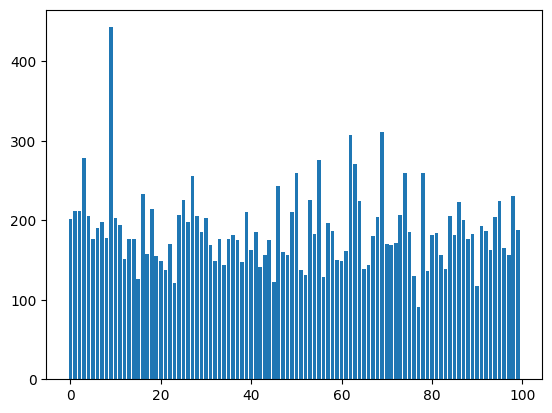

In [ ]:
from matplotlib import pyplot as plt
x = [i for i in range(len(count))]
plt.bar(x,count)

#Correlation

In [ ]:
import openai
from openai import OpenAI
import re
import time
from IPython.display import clear_output

client = OpenAI(api_key=key)

correct = 0
def wait(w=0):
  if(w):
    print(answer_line, f"i={i}, prob_ans={prob_ans}, correct opt = {correct_list[i]}, correct_ans={corr_ans}")
    input()
    clear_output(wait=True)

s,e = 50,len(dataset["test"])-1
with (open("/content/drive/MyDrive/Correlation/Aqua/QAP150_Result.txt", "a") as f,
    open("/content/drive/MyDrive/Correlation/Aqua/QAP150_Answer.txt", "a") as d):
  if s == 0:
    f.write("QAP150, Temperature: 0.7, TopP: 0.95 \n")
    d.write("QAP150, Temperature: 0.7, TopP: 0.95 \n")
  word_count = []
  results = []
  for i, batch in enumerate(dataset["test"]): # Change debug_dataloader to train_dataloader or dev_dataloader when necessary
    if i < s:
      continue
    if(i > e):
      break
    question = batch['question']
    options = ''
    for o in batch['options']:
      options = options + " " + o
    #prompt = f"{question} \n {options} \n Take a deep breath and work on this problem step-by-step."
    prompt = f"{question} \n {options} \n Explain this problem to me in at least 150 words. Then solve for the answer."
    #prompt = f"{question}\n{options}\n"
    #prompt = f"{chain_of_thought_aqua}\n{question}\n{options}"
    #prompt = f"{question} \n {options} \n Evenly split the question into 3 mini-questions. Outline 1 possible error in each mini-question and explain them in at least 50 words each, then solve each mini-question. Finally, solve the question considering your mini-questions and errors."
    true_answer = batch['correct']
    for j in range(3):
      correct = 0
      response = client.chat.completions.create(
      model="gpt-3.5-turbo",
      temperature = 0.7,
      top_p = 0.95,
      messages=[
        {"role": "system", "content": "You are a helpful assistant. You will be given multiple choice answers for each question. Your final answer should be formatted with 'the correct answer is [your choice].'"},
        {"role": "user", "content": prompt}
              ]
      )
      answer_line = response.choices[0].message.content
      word_count.append(len(answer_line.split()))
      prob_ans = re.findall("the correct answer is (?:\(|\[)?([A|B|C|D|E])", answer_line, re.IGNORECASE)
      if(prob_ans):
        prob_ans = prob_ans[-1]
        if (prob_ans == true_answer):
          correct += 1
          wait()
        else: wait()
      else:
        # the LLM outputs numeric answer instead of option.
        # so find the correct numreic answer based on correct option.
        if batch['correct'] == 'A':
          n = 0
        elif batch['correct'] == 'B':
          n = 1
        elif batch['correct'] == 'C':
          n = 2
        elif batch['correct'] == 'D':
          n = 3
        elif batch['correct'] == 'E':
          n = 4

        corr_ans = batch['options'][n]
        corr_ans = corr_ans.replace(f"{batch['correct']})",'').replace("$",'').replace(",",'').replace("%",'').replace("Rs.",'').replace("minutes",'').replace('miles','').replace('km','').replace(' ','')
        #corr_ans = re.findall(r"[-+]?[\$]?([0-9,]+\.*\d*)", corr_ans)

        #prob_ans = ans.split("\n")[-2] # last line
        prob_ans = re.findall(r"[-+]?[$]?([0-9,]+\.*\d*)", answer_line)
        if(prob_ans):
          prob_ans = prob_ans[-1].replace("$",'').replace(",","").replace("#","").replace(' ','').rstrip('.')
          if(prob_ans == corr_ans):
            correct += 1
          else: wait()
        else:
          prob_ans = re.findall("the correct answer is (.*?)\.", answer_line,re.IGNORECASE)
          if(prob_ans):
            prob_ans = prob_ans[-1].replace("$",'').replace(",","").replace("#","").replace(' ','')
          if(prob_ans == corr_ans):
            correct += 1
          else: wait()

      if prob_ans == '':
        prob_ans = "[]"
      else:
        prob_ans = prob_ans[0]
      d.write(f"Question[{i}]:\n {question}\n{options}\n")
      d.write(f"Correct answer:\n {true_answer}\n")
      d.write(f"Full answer:\n {answer_line}\n")
      d.write(f"Our answer:\n {prob_ans}\n")
      d.write("-"*100+"\n")
      if correct:
        results.append(1)
        f.write(f"{i} Correct {len(answer_line.split())} \n")
        print(f"{i} Correct {len(answer_line.split())}")
      else:
        results.append(0)
        f.write(f"{i} Incorrect {len(answer_line.split())} \n")
        print(f"{i} Incorrect {len(answer_line.split())}")
      d.flush()
      f.flush()


50 Correct 146
50 Correct 150
50 Correct 165
51 Correct 193
51 Correct 176
51 Correct 167
52 Correct 169
52 Incorrect 254
52 Correct 139
53 Correct 167
53 Incorrect 204
53 Correct 168
54 Correct 330
54 Incorrect 327
54 Incorrect 327
55 Correct 137
55 Correct 148
55 Correct 208
56 Incorrect 277
56 Incorrect 197
56 Incorrect 266
57 Incorrect 156
57 Correct 192
57 Correct 193
58 Incorrect 227
58 Incorrect 188
58 Correct 218
59 Incorrect 281
59 Incorrect 266
59 Incorrect 262
60 Correct 171
60 Correct 228
60 Incorrect 226
61 Correct 250
61 Correct 258
61 Correct 250
62 Correct 177
62 Correct 157
62 Correct 200
63 Incorrect 206
63 Correct 231
63 Correct 324
64 Incorrect 227
64 Incorrect 259
64 Incorrect 245
65 Incorrect 270
65 Correct 204
65 Incorrect 270
66 Correct 210
66 Incorrect 280
66 Incorrect 231
67 Correct 248
67 Incorrect 196
67 Incorrect 220
68 Incorrect 2916
68 Correct 178
68 Incorrect 238
69 Incorrect 243
69 Incorrect 230
69 Incorrect 227
70 Incorrect 189
70 Correct 169
70 Correc

In [ ]:
prob_ans

''

In [3]:
import numpy as np
import re
results = []
corr = []
with (open("/content/drive/MyDrive/Correlation/Aqua/QAP150_Result.txt", "r") as f):
  content = f.read()
  q_no, correct_list, word_count = zip(*re.findall("(\d+) (Correct|Incorrect) (\d+)",content,re.DOTALL))
  for r in correct_list:
    if r == 'Correct':
      results.append(1)
    else:
      results.append(0)
  word_count = [int(i) for i in word_count]
  for i in range(0,len(results),3):
    #print(np.corrcoef(word_count[i:i+3], results[i:i+3]))
    if results[i:i+3] != [0,0,0] and results[i:i+3] != [1,1,1] and word_count[i] != word_count[i+1] and word_count[i] != word_count[i+2]:
      corr.append(np.corrcoef(word_count[i:i+3], results[i:i+3])[0,1])
  print(np.mean(corr))


-0.02758468503889807


In [ ]:
np.min(word_count), np.max(word_count), np.mean(word_count), np.std(word_count)

(85, 3000, 227.7217847769029, 133.97566580068127)

In [ ]:
data = word_count

# Define the bucket intervals (you can customize this based on your requirements)
bucket_intervals = [500,1000,1500,2000,2500,3000]

# Calculate the higher end of each bucket
bucket_higher_ends = [upper for upper in bucket_intervals[1:]]

# Replace the numbers in the list with the higher end of their respective buckets
for i in range(len(data)):
    for j in range(len(bucket_intervals) - 1):
        lower, upper = bucket_intervals[j], bucket_intervals[j + 1]
        if lower <= data[i] < upper:
            data[i] = bucket_higher_ends[j]
            break

word_count = data
for i in range(0,len(results),3):
  #print(np.corrcoef(word_count[i:i+3], results[i:i+3]))
  if results[i:i+3] != [0,0,0] and results[i:i+3] != [1,1,1] and word_count[i] != word_count[i+1] and word_count[i] != word_count[i+2]:
    corr.append(np.corrcoef(word_count[i:i+3], results[i:i+3])[0,1])
print(np.mean(corr))

-0.027178210275290132


In [4]:
import numpy as np
results = []
corr = []
high = 0
low = 0
with (open("/content/drive/MyDrive/Correlation/Aqua/CoT_Result.txt", "r") as f):
  content = f.read()
  q_no, correct_list, word_count = zip(*re.findall("(\d+) (Correct|Incorrect) (\d+)",content,re.DOTALL))
  for r in correct_list:
    if r == 'Correct':
      results.append(1)
    else:
      results.append(0)
  word_count = [int(i) for i in word_count]
  for i in range(0,len(results),3):
    #print(np.corrcoef(word_count[i:i+3], results[i:i+3]))
    if results[i:i+3] != [0,0,0] and results[i:i+3] != [1,1,1] and word_count[i] != word_count[i+1] and word_count[i] != word_count[i+2]:
      print(word_count[i:i+3], results[i:i+3],end="")
      cp = results[i:i+3].index(1)
      wp = results[i:i+3].index(0)
      if word_count[i+cp] >= word_count[i+wp]:
        high += 1
        print(' H')
      else:
        low += 1
        print(' L')

[133, 157, 131] [1, 0, 1] L
[122, 92, 117] [0, 1, 1] L
[137, 97, 119] [0, 0, 1] L
[78, 59, 75] [1, 1, 0] H
[129, 187, 200] [0, 0, 1] H
[94, 151, 100] [0, 1, 0] H
[155, 43, 35] [1, 0, 0] H
[50, 6, 74] [0, 1, 1] L
[131, 111, 127] [1, 1, 0] H
[179, 59, 172] [1, 0, 1] H
[259, 256, 187] [1, 0, 0] H
[258, 130, 235] [0, 1, 0] L
[153, 122, 184] [0, 1, 1] L
[73, 95, 76] [1, 0, 1] L
[63, 107, 13] [1, 1, 0] H
[110, 6, 56] [1, 0, 1] H
[128, 141, 194] [0, 0, 1] H
[77, 72, 79] [0, 1, 1] L
[213, 6, 120] [0, 0, 1] L
[101, 84, 113] [1, 0, 0] H
[121, 97, 104] [1, 1, 0] H
[157, 73, 128] [1, 1, 0] H
[220, 228, 209] [0, 0, 1] L
[130, 172, 203] [0, 1, 0] H
[194, 211, 172] [1, 0, 0] L
[99, 130, 181] [1, 0, 0] L
[123, 130, 88] [1, 0, 0] L
[92, 52, 130] [1, 0, 1] H
[53, 45, 112] [0, 0, 1] H
[79, 187, 121] [0, 1, 0] H
[235, 210, 193] [0, 1, 0] L
[97, 105, 80] [0, 1, 0] H
[116, 183, 133] [0, 1, 0] H
[152, 69, 109] [1, 0, 1] H
[125, 228, 201] [1, 0, 0] L
[65, 66, 48] [1, 0, 1] L
[236, 160, 214] [0, 0, 1] L
[73, 6

In [ ]:
high,low

(7, 7)

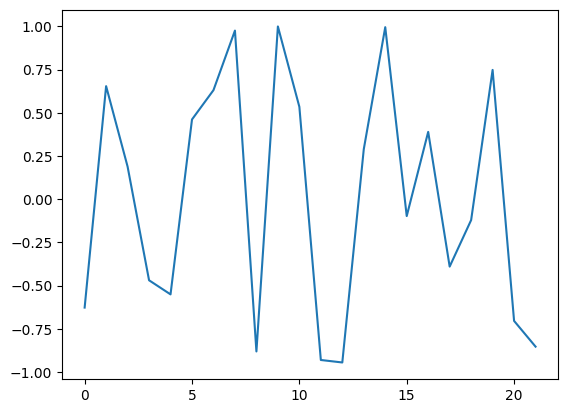

In [ ]:
from matplotlib import pyplot as plt
plt.plot(corr)

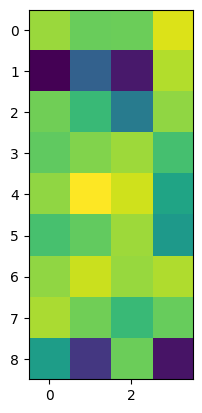

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
a= [
 [78.7, 52.8, 70.9, 65.1],
 [67.1, 39.4, 35.0, 63.1],
 [77.8, 50.0, 52.7, 61.4],
 [77.4, 53.9, 75.0, 57.1],
 [78.5, 59.4, 78.6, 53.2],
 [76.8, 52.4, 75.0, 51.8],
 [78.5, 57.1, 74.5, 62.9],
 [79.0, 53.1, 65.9, 59.2],
 [74.7, 35.0, 70.9, 35.6],
 ]
data = np.array(a)
normalized_data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

plt.imshow(normalized_data, cmap='viridis')